In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dogs-vs-cats/test1.zip
/kaggle/input/dogs-vs-cats/train.zip
/kaggle/input/dogs-vs-cats/sampleSubmission.csv


In [2]:
# Importing important libraries and modules
import cv2
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dropout, Conv2D, Dense, BatchNormalization, AveragePooling2D, MaxPooling2D, Flatten
from keras.models import Sequential, load_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from zipfile import ZipFile

In [3]:
# Extracting the training data and test data for prediction from the zip file

# for training data
with ZipFile('../input/dogs-vs-cats/train.zip', 'r') as zip: 
    print('Extracting all the files for training data now...') 
    zip.extractall() 
    print('Done!')
    
# for test data for prediction   
with ZipFile('../input/dogs-vs-cats/test1.zip', 'r') as zip: 
    print('Extracting all the files for test data for prediction now...') 
    zip.extractall() 
    print('Done!')    
            

Extracting all the files for training data now...
Done!
Extracting all the files for test data for prediction now...
Done!


In [4]:
detail = glob.glob("./train/*")


In [5]:
detail

['./train/cat.7093.jpg',
 './train/dog.5880.jpg',
 './train/dog.7758.jpg',
 './train/dog.3307.jpg',
 './train/cat.12168.jpg',
 './train/dog.9182.jpg',
 './train/dog.10587.jpg',
 './train/cat.10332.jpg',
 './train/dog.521.jpg',
 './train/dog.3502.jpg',
 './train/cat.10022.jpg',
 './train/cat.1708.jpg',
 './train/cat.1175.jpg',
 './train/dog.7172.jpg',
 './train/dog.10850.jpg',
 './train/dog.7185.jpg',
 './train/cat.11260.jpg',
 './train/dog.555.jpg',
 './train/cat.9359.jpg',
 './train/dog.1450.jpg',
 './train/cat.8338.jpg',
 './train/cat.5417.jpg',
 './train/dog.11194.jpg',
 './train/cat.2713.jpg',
 './train/cat.6789.jpg',
 './train/dog.11041.jpg',
 './train/cat.5523.jpg',
 './train/dog.171.jpg',
 './train/dog.7507.jpg',
 './train/cat.9592.jpg',
 './train/cat.8788.jpg',
 './train/dog.8129.jpg',
 './train/cat.7145.jpg',
 './train/cat.9294.jpg',
 './train/cat.10281.jpg',
 './train/dog.7826.jpg',
 './train/cat.11515.jpg',
 './train/dog.6893.jpg',
 './train/dog.12251.jpg',
 './train/cat.825

In [6]:
# Getting all file names

In [7]:
# Folder Names
folder_names=[ str(i).split("n/")[0] +"n" for i in detail]
# File Names
image_names=[ str(i).split('/')[2] for i in detail]

# Object Name ( Cat or Dog )

object_names=[ str(i.split('.')[0]) for i in image_names ]

object_class=[ 1 if name=='dog' else 0 for name in object_names]

In [8]:
detail[0].split('.')

['', '/train/cat', '7093', 'jpg']

In [9]:
data=pd.DataFrame()

data['folder_name']=folder_names
data['image_name']=image_names
data['object_name']=object_names
data['label']=object_class

data.reset_index(inplace=True,drop=True)

In [10]:
data.head()

,folder_name,image_name,object_name,label
0,./train,cat.7093.jpg,cat,0
1,./train,dog.5880.jpg,dog,1
2,./train,dog.7758.jpg,dog,1
3,./train,dog.3307.jpg,dog,1
4,./train,cat.12168.jpg,cat,0


In [11]:
data[data['object_name']=='dog']

,folder_name,image_name,object_name,label
1,./train,dog.5880.jpg,dog,1
2,./train,dog.7758.jpg,dog,1
3,./train,dog.3307.jpg,dog,1
5,./train,dog.9182.jpg,dog,1
6,./train,dog.10587.jpg,dog,1
...,...,...,...,...
24993,./train,dog.3566.jpg,dog,1
24996,./train,dog.10950.jpg,dog,1
24997,./train,dog.2805.jpg,dog,1
24998,./train,dog.11460.jpg,dog,1


In [12]:
# Splitting the data into train and test
train_data,test_data=train_test_split(data,stratify=data['label'],test_size=0.1)

# Splitting the train data into train and validation data

train_data,validation_data=train_test_split(train_data,stratify=train_data['label'],test_size=0.1)

In [13]:
# Shapes

train_data.shape,validation_data.shape,test_data.shape

((20250, 4), (2250, 4), (2500, 4))

In [14]:
train_data.reset_index(inplace=True,drop=True)
validation_data.reset_index(inplace=True,drop=True)
test_data.reset_index(inplace=True,drop=True)

Text(0.5, 1.0, 'Test Data')

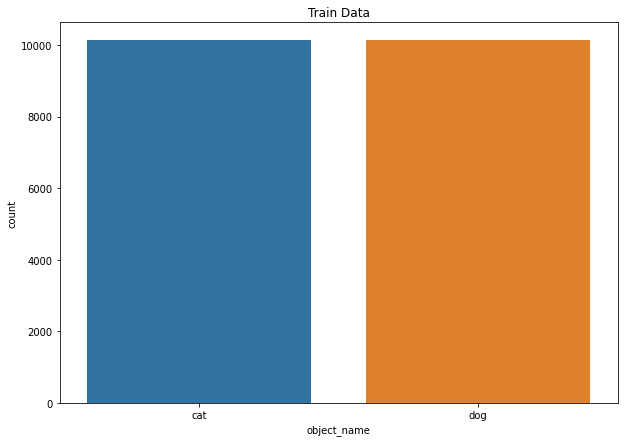

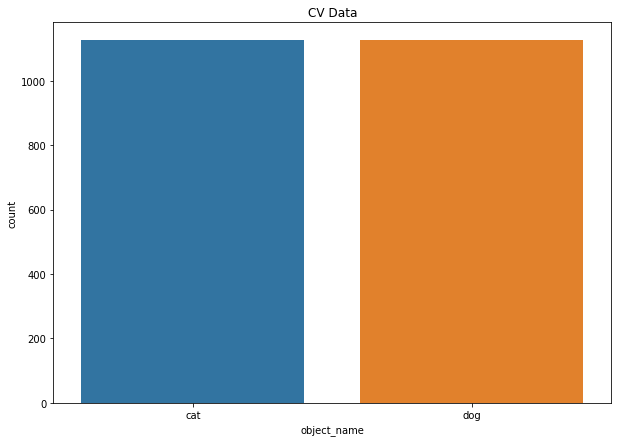

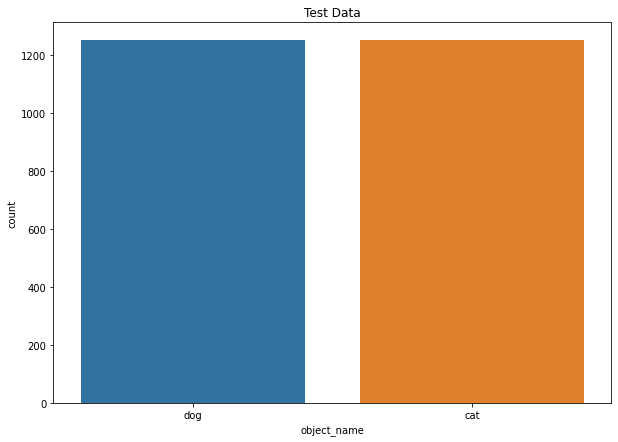

In [15]:
# Plotting the data 

plt.figure(figsize=(10,7))
sns.countplot(x='object_name',data=train_data)
plt.title('Train Data')

plt.figure(figsize=(10,7))
sns.countplot(x='object_name',data=validation_data)
plt.title('CV Data')


plt.figure(figsize=(10,7))
sns.countplot(x='object_name',data=test_data)
plt.title('Test Data')


In [16]:
detail

['./train/cat.7093.jpg',
 './train/dog.5880.jpg',
 './train/dog.7758.jpg',
 './train/dog.3307.jpg',
 './train/cat.12168.jpg',
 './train/dog.9182.jpg',
 './train/dog.10587.jpg',
 './train/cat.10332.jpg',
 './train/dog.521.jpg',
 './train/dog.3502.jpg',
 './train/cat.10022.jpg',
 './train/cat.1708.jpg',
 './train/cat.1175.jpg',
 './train/dog.7172.jpg',
 './train/dog.10850.jpg',
 './train/dog.7185.jpg',
 './train/cat.11260.jpg',
 './train/dog.555.jpg',
 './train/cat.9359.jpg',
 './train/dog.1450.jpg',
 './train/cat.8338.jpg',
 './train/cat.5417.jpg',
 './train/dog.11194.jpg',
 './train/cat.2713.jpg',
 './train/cat.6789.jpg',
 './train/dog.11041.jpg',
 './train/cat.5523.jpg',
 './train/dog.171.jpg',
 './train/dog.7507.jpg',
 './train/cat.9592.jpg',
 './train/cat.8788.jpg',
 './train/dog.8129.jpg',
 './train/cat.7145.jpg',
 './train/cat.9294.jpg',
 './train/cat.10281.jpg',
 './train/dog.7826.jpg',
 './train/cat.11515.jpg',
 './train/dog.6893.jpg',
 './train/dog.12251.jpg',
 './train/cat.825

In [17]:
# Let's process our data 


train_x=[]
train_y=[]


for i in range(len(train_data)):
    path1=train_data['folder_name'][i]
    path2=train_data['image_name'][i]
    path=os.path.join(path1,path2)
    image=cv2.imread(path)
    image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    image=cv2.resize(image,(128,128))
    # Normalize 
    
    image=image/255.0
    
    train_x.append(image)
    train_y.append(train_data['label'][i])
    
    
    
train_x=np.array(train_x)
train_y=np.array(train_y)

# For CV Data


cv_x=[]
cv_y=[]


for i in range(len(validation_data)):
    path1=validation_data['folder_name'][i]
    path2=validation_data['image_name'][i]
    path=os.path.join(path1,path2)
    image=cv2.imread(path)
    image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    image=cv2.resize(image,(128,128))
    # Normalize 
    
    image=image/255.0
    
    cv_x.append(image)
    cv_y.append(validation_data['label'][i])
    
    
    
cv_x=np.array(cv_x)
cv_y=np.array(cv_y)


# For Test 


test_x=[]
test_y=[]


for i in range(len(test_data)):
    path1=test_data['folder_name'][i]
    path2=test_data['image_name'][i]
    path=os.path.join(path1,path2)
    image=cv2.imread(path)
    image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    image=cv2.resize(image,(128,128))
    # Normalize 
    
    image=image/255.0
    
    test_x.append(image)
    test_y.append(test_data['label'][i])
    
    
    
test_x=np.array(test_x)
test_y=np.array(test_y)



In [18]:
train_x.shape,train_y.shape

((20250, 128, 128), (20250,))

0
0
0
10125


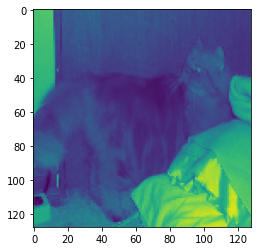

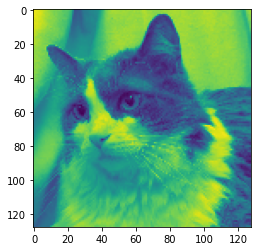

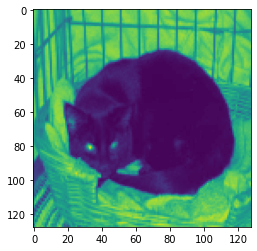

In [19]:
# Cross checking the processing 

n=100

plt.imshow(train_x[n])
print(train_y[n])

plt.figure()
plt.imshow(cv_x[n])
print(cv_y[n])

plt.figure()
plt.imshow(test_x[n])
print(test_y[n])

print(len(train_y[train_y==1]))

In [20]:
# We also need to read the test data for prediction from a file which contains data in the form of image. 
# The folder is named as 'test1' and it contains images of dogs and cats

# First of all we will extract the detail of all the data and save all of them in terms of dataframe with foldername and imagename only
detail = glob.glob("./test1/*")
foldername = [str(i.split("1/")[0]) + "1" for i in detail]
imagename = [str(i.split("/")[2]) for i in detail]

# Defining dataframe and saving all the extracted information in that dataframe
test_data_for_prediction = pd.DataFrame() 
test_data_for_prediction["foldername"] = foldername
test_data_for_prediction["imagename"] = imagename

# Analying the test data set for prediction detail
print("\nNumber of images in test data set for prediction  = "+str(len(detail)))
print(test_data_for_prediction.columns)
test_data_for_prediction.head()


Number of images in test data set for prediction  = 12500
Index(['foldername', 'imagename'], dtype='object')


,foldername,imagename
0,./test1,7741.jpg
1,./test1,1100.jpg
2,./test1,4612.jpg
3,./test1,3743.jpg
4,./test1,1232.jpg


In [21]:
# Changing the data into an array of pixels and labels so that it can be fed into the model for prediction 
# Initially it was in the form of a DataFrame

# for test data for prediction data
prediction = []
for i in range(len(test_data_for_prediction)):
        path1 = test_data_for_prediction["foldername"][i]
        path2 = test_data_for_prediction["imagename"][i]
        image = cv2.imread(os.path.join(path1, path2))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        image = cv2.resize(image, (128, 128))
        #here, we are normalizing the images
        norm_image = image/255.0 
        #Creating and saving each image in the form of numerical data in an array 
        prediction.append(norm_image) 
prediction = np.array(prediction)
print(" for test data for prediction ", prediction.shape)

 for test data for prediction  (12500, 128, 128)


In [22]:
print(train_x.shape)
print(test_x.shape)
print(cv_x.shape)
print(prediction.shape)

(20250, 128, 128)
(2500, 128, 128)
(2250, 128, 128)
(12500, 128, 128)


In [23]:
train_x=train_x.reshape(20250,128,128,1)
test_x=test_x.reshape(2500,128,128,1)
cv_x=cv_x.reshape(2250,128,128,1)
prediction=prediction.reshape(12500,128,128,1)

In [24]:
train_x.shape

(20250, 128, 128, 1)

In [25]:
model=keras.Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(128,128,1)))
model.add(MaxPooling2D())
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dropout(0.7))
model.add(keras.layers.Dense(units=512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1,activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 128)       1

In [26]:
model.compile(loss = 'binary_crossentropy', optimizer = "adam", metrics = ["accuracy"])

hist=model.fit(train_x,train_y,validation_data=(cv_x,cv_y),epochs=50)

Epoch 1/50
633/633 [==============================] - 11s 13ms/step - loss: 0.6844 - accuracy: 0.5467 - val_loss: 0.6268 - val_accuracy: 0.6271
Epoch 2/50
633/633 [==============================] - 7s 11ms/step - loss: 0.5781 - accuracy: 0.7004 - val_loss: 0.4808 - val_accuracy: 0.7787
Epoch 3/50
633/633 [==============================] - 7s 12ms/step - loss: 0.4981 - accuracy: 0.7608 - val_loss: 0.4304 - val_accuracy: 0.8022
Epoch 4/50
633/633 [==============================] - 7s 11ms/step - loss: 0.4372 - accuracy: 0.7949 - val_loss: 0.3850 - val_accuracy: 0.8369
Epoch 5/50
633/633 [==============================] - 7s 11ms/step - loss: 0.3944 - accuracy: 0.8188 - val_loss: 0.3386 - val_accuracy: 0.8507
Epoch 6/50
633/633 [==============================] - 7s 11ms/step - loss: 0.3641 - accuracy: 0.8362 - val_loss: 0.3144 - val_accuracy: 0.8662
Epoch 7/50
633/633 [==============================] - 7s 11ms/step - loss: 0.3214 - accuracy: 0.8640 - val_loss: 0.3141 - val_accuracy: 0.872

In [35]:
train_loss=hist.history['loss']
cv_loss=hist.history['val_loss']
train_acc=hist.history['accuracy']
cv_acc=hist.history['val_accuracy']

In [36]:
epoch_number=list(range(1,51))

In [38]:
# printing a table depicting the detail about the trained model
log_frame = pd.DataFrame(columns = ["Epoch", "Train_Loss", "Train_Accuracy", "CV_Loss", "CV_Accuracy"])
log_frame["Epoch"] = epoch_number
log_frame["Train_Loss"] = train_loss
log_frame["Train_Accuracy"] = train_acc
log_frame["CV_Loss"] = cv_loss
log_frame["CV_Accuracy"] = cv_acc 
log_frame

,Epoch,Train_Loss,Train_Accuracy,CV_Loss,CV_Accuracy
0,1,0.662044,0.593531,0.626762,0.627111
1,2,0.554278,0.718568,0.480758,0.778667
2,3,0.491524,0.764148,0.430385,0.802222
3,4,0.433369,0.798617,0.385016,0.836889
4,5,0.390749,0.822914,0.338618,0.850667
5,6,0.355059,0.842815,0.314362,0.866222
6,7,0.320903,0.862864,0.314105,0.872444
7,8,0.293239,0.874716,0.283481,0.874222
8,9,0.278674,0.881383,0.289100,0.875111
9,10,0.253166,0.894469,0.274121,0.880444


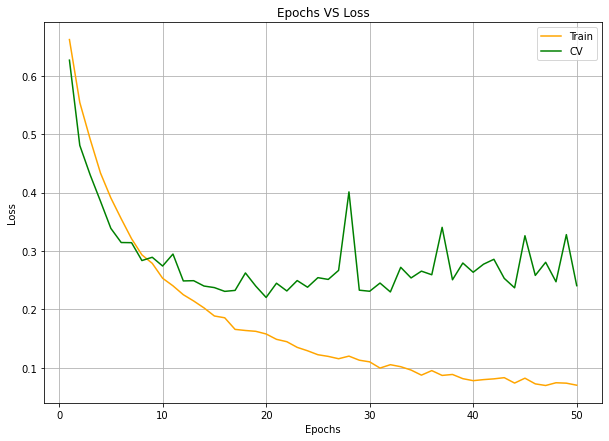

In [47]:
# Plotting Epochs vs Loss

def plotting(epoch,train_los,val_los):
    plt.figure(figsize=(10,7))
    plt.plot(epoch,train_los,color='orange',label='Train')
    plt.plot(epoch,val_los,color='green',label='CV')
    plt.grid()
    plt.title("Epochs VS Loss")
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

plotting(log_frame['Epoch'],log_frame['Train_Loss'],log_frame['CV_Loss'])

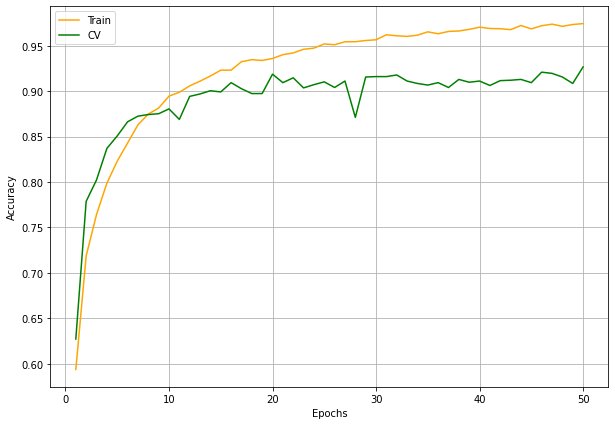

In [51]:
# Plotting Epoch Vs Accuracy

def plot_acc(epoch,train_ac,val_ac):
    plt.figure(figsize=(10,7))
    plt.plot(epoch,train_ac,color='orange',label='Train')
    plt.plot(epoch,val_ac,color='green',label='CV')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.grid()
    plt.legend()
    
plot_acc(log_frame['Epoch'],log_frame['Train_Accuracy'],log_frame['CV_Accuracy'])

In [53]:
#  Predicting on the test data 

test_pred=model.predict(test_x)

In [54]:
# Since the test prediction is a series of values from 0 to 1 , we will convert into categorical data 

l=[]

for pred in test_pred:
    if pred < 0.5:
        l.append(0)
    else:
        l.append(1)
        
test_predict=pd.DataFrame(l,columns=['Pred'])

In [56]:
test_predict

,Pred
0,0
1,1
2,1
3,1
4,0
...,...
2495,0
2496,0
2497,1
2498,0


In [58]:
acc=accuracy_score(test_y,test_predict)
acc

0.9244

In [67]:
prediction_pred=model.predict(prediction)
prediction_pred

array([[5.1147765e-01],
       [8.7979758e-01],
       [5.4682791e-03],
       ...,
       [1.2938511e-06],
       [1.2392011e-21],
       [9.9996245e-01]], dtype=float32)

In [68]:
# Since the prediction is a series of values from 0 to 1 , we will convert into categorical data 

l=[]

for pred in prediction_pred:
    if pred < 0.5:
        l.append(0)
    else:
        l.append(1)
        
prediction_pred=pd.DataFrame(l,columns=['label'])

In [69]:
prediction_pred

,label
0,1
1,1
2,0
3,0
4,1
...,...
12495,1
12496,0
12497,0
12498,0


In [79]:
# loading sample submission file and dropping the falsely labelled column from Sample submission file and clubing it with the predicted file 
submission = pd.read_csv('../input/dogs-vs-cats/sampleSubmission.csv')

In [80]:
submission['label']=l

In [81]:
submission1

,id,label
0,1,1
1,2,1
2,3,0
3,4,0
4,5,1
...,...,...
12495,12496,1
12496,12497,0
12497,12498,0
12498,12499,0


Cat


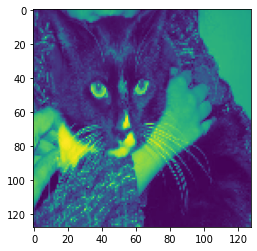

In [82]:
# Validating the image by polotting 

n=100

plt.imshow(prediction[n])

if(submission1.iloc[n]['label']==0):
    print("Cat")
else:
    print("Dog")

In [78]:
# Delete unwanted output files
import shutil
shutil.rmtree('./train')
shutil.rmtree('./test1')

In [83]:
# Saving the submission file
submission.to_csv('submission.csv', index = False)

__notebook_source__.ipynb  submission.csv
